<a href="https://colab.research.google.com/github/hitenmewada/EDA-hotel-dataset/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Study on Average Daily Rates (ADR)
-> ADR - Average Daily Rate is the average revenue that a hotel receives for each occupied guest room per day.

  * What is the Yearly average of ADR with respect to hotel type ?
  * What is a monthly Average daily rates (adr) ?
  * How does the ADR Vary Over the Year by Hotel Type ?
  * Find out the Relationship between Average Daily Rate(ADR) and Arrival Month by Booking Cancellation Status ?

In [1]:
# importing library's and modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# connecting to drive for data set 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# storing the dataset in to variable 
hotel_df = pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

In [4]:
# seting the columns display size to 36
pd.set_option ("display.max_columns", 36)

In [5]:
# exploring dataset
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
# displaying top 5 rows
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# displaying 5 bottom rows
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [8]:
# exploring columns 
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
# observing information about dataset 
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
# checking unique values 
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [11]:
hotel_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [12]:
# checking null values from dataset 
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

As we Observe till now is that we have 2 different hotels which are resort hotel and city hotel and we have 3 years of data of 2015,2016 and 2017. after this we check if any null values are present in hotel,adr,is_canceled,arrival_date_year,arrival_date_month columns and we found that there no null values present.

Q-1 What is the Yearly average of ADR with respect to hotel type ?

In [13]:
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [14]:
# here we taking arrival year, month, adr by 'resort hotel' 
Resort_hotel = hotel_df[(hotel_df['hotel'] == 'Resort Hotel')][['arrival_date_year','arrival_date_month','adr']]

In [15]:
# here we taking arrival year, month, adr by 'city hotel'
City_hotel = hotel_df[(hotel_df['hotel'] == 'City Hotel')][['arrival_date_year','arrival_date_month','adr']]

In [16]:
# here we grouping all the values by arrival year and take average adr for resort hotel
Resort_hotel_adr_by_year = Resort_hotel.groupby('arrival_date_year')['adr'].mean().reset_index()
Resort_hotel_adr_by_year

,arrival_date_year,adr
0,2015,89.353417
1,2016,87.730762
2,2017,108.660217


In [17]:
# here we grouping all the values by arrival year and take average adr for city hotel
City_hotel_adr_by_year = City_hotel.groupby('arrival_date_year')['adr'].mean().reset_index()
City_hotel_adr_by_year

,arrival_date_year,adr
0,2015,85.856915
1,2016,103.483683
2,2017,117.501864


In [18]:
# here we concatenate the resort hotel adr and city hotel adr with arrival year
adr_by_year_hotel_type = pd.concat([Resort_hotel_adr_by_year['arrival_date_year'],Resort_hotel_adr_by_year['adr'],City_hotel_adr_by_year['adr']],axis=1)
adr_by_year_hotel_type.columns = ['Years','Resort Hotel adr','City Hotel adr']

In [19]:
# here we set the index by arrival years 
adr_by_year_hotel_type.set_index('Years',inplace=True)

Text(0.5, 1.0, 'Yearly ADR by Both Hotel')

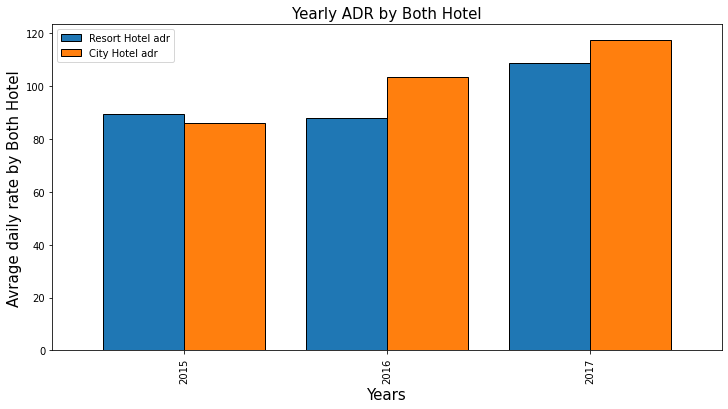

In [20]:
# here we creating the bar plot to Visualize the results 
ax=adr_by_year_hotel_type[['Resort Hotel adr','City Hotel adr']].plot.bar( 
    width=0.8,
    linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10);
ax.set_xlabel('Years', fontsize = 15)
ax.set_ylabel('Avrage daily rate by Both Hotel', fontsize = 15)
ax.set_title('Yearly ADR by Both Hotel',fontsize = 15)

As we can see over the years the Average daily rate has been increased in both hotel and city hotel is more expensive then resort hotel but in 2015 resort hotel is slightly expensive as compared to city hotel. 

Q-2 What is a monthly Average daily rates (adr) ?

In [21]:
hotel_df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [22]:
hotel_df['adr']

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

In [23]:
# here we defining the function for encoding object months to numeric months. 
def encoding_months_by_num(str_month):
  month_dict = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
  for i,j in month_dict.items():
    if i == str_month:
      return int(j)

In [24]:
# here we grouping all the values by arrival month and take average adr 
monthly_adr = hotel_df.groupby('arrival_date_month')['adr'].mean().reset_index()

In [25]:
# here we encoding the months by numeric months and creating new column 
monthly_adr['month_by_no'] = monthly_adr['arrival_date_month'].apply(lambda x :encoding_months_by_num(x))

In [26]:
# here we sort the values by numeric months 
monthly_adr.sort_values('month_by_no',inplace=True)

In [27]:
monthly_adr

,arrival_date_month,adr,month_by_no
4,January,70.361241,1
3,February,73.582276,2
7,March,80.679646,3
0,April,100.380790,4
8,May,108.695516,5
6,June,116.672192,6
5,July,126.788013,7
1,August,140.111523,8
11,September,105.049657,9
10,October,87.908879,10


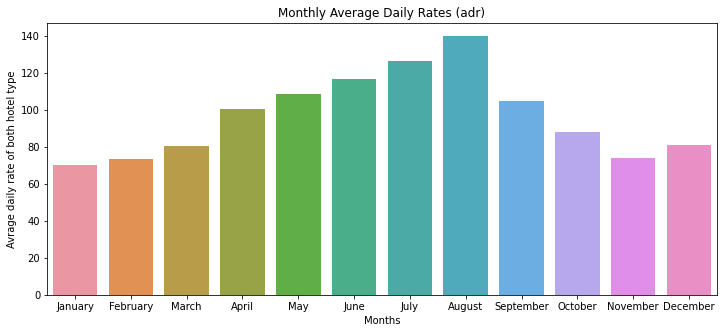

In [28]:
# here we Visualizing the results of months adr by using bar plot
plt.figure(figsize=(12,5))
sns.barplot(x="arrival_date_month",y="adr",data=monthly_adr)
plt.xlabel('Months')
plt.ylabel('Avrage daily rate of both hotel type')
plt.title('Monthly Average Daily Rates (adr)')
plt.show()

As we can see the highest Average Daily Rate (ADR) has occurred in August month it means both hotel is expensive in August and best time to book hotel is January due to the lowest average daily rate  

Q-3 How does the ADR Vary Over the Year by Hotel Type ?

In [29]:
# here we grouping all the values by arrival month and take average adr from resort hotel
Resort_hotel_adr_by_month = Resort_hotel.groupby('arrival_date_month')['adr'].mean().reset_index()

In [30]:
# here we encoding the months by numeric months and creating new column 
Resort_hotel_adr_by_month['month_by_no'] = Resort_hotel_adr_by_month['arrival_date_month'].apply(lambda x :encoding_months_by_num(x))

In [31]:
# here we sort the values by numeric months 
Resort_hotel_adr_by_month.sort_values(by='month_by_no',inplace=True)

In [32]:
Resort_hotel_adr_by_month

,arrival_date_month,adr,month_by_no
4,January,49.461883,1
3,February,55.171930,2
7,March,57.520147,3
0,April,77.849496,4
8,May,78.758134,5
6,June,110.444749,6
5,July,155.181299,7
1,August,186.790574,8
11,September,93.252030,9
10,October,62.097617,10


In [33]:
# here we grouping all the values by arrival month and take average adr from city hotel
City_hotel_adr_by_month = City_hotel.groupby('arrival_date_month')['adr'].mean().reset_index()

In [34]:
# here we encoding the months by numeric months and creating new column 
City_hotel_adr_by_month['month_by_no'] = City_hotel_adr_by_month['arrival_date_month'].apply(lambda x :encoding_months_by_num(x))

In [35]:
# here we sort the values by numeric months 
City_hotel_adr_by_month.sort_values(by='month_by_no',inplace=True)

In [36]:
City_hotel_adr_by_month

,arrival_date_month,adr,month_by_no
4,January,82.628986,1
3,February,85.088278,2
7,March,92.643116,3
0,April,111.251838,4
8,May,121.638560,5
6,June,119.074341,6
5,July,110.734292,7
1,August,114.680455,8
11,September,110.004661,9
10,October,99.974498,10


In [37]:
# here we concatenate the resort hotel adr and city hotel adr with arrival month
adr_by_hotel_type = pd.concat([Resort_hotel_adr_by_month['arrival_date_month'],Resort_hotel_adr_by_month['adr'],City_hotel_adr_by_month['adr']],axis=1)

In [38]:
# here we renaming the columns
adr_by_hotel_type.columns = ['Month','Resort Hotel adr','City Hotel adr']

In [39]:
adr_by_hotel_type

,Month,Resort Hotel adr,City Hotel adr
4,January,49.461883,82.628986
3,February,55.171930,85.088278
7,March,57.520147,92.643116
0,April,77.849496,111.251838
8,May,78.758134,121.638560
6,June,110.444749,119.074341
5,July,155.181299,110.734292
1,August,186.790574,114.680455
11,September,93.252030,110.004661
10,October,62.097617,99.974498


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


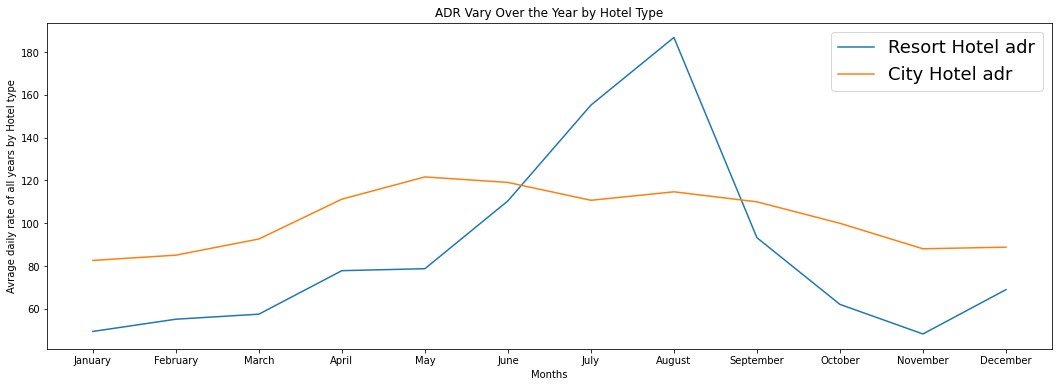

In [40]:
# here we Visualizing the results of hotel type adr by month using line plot
plt.figure(figsize=(18,6))
sns.lineplot(adr_by_hotel_type['Month'],adr_by_hotel_type['Resort Hotel adr'])
sns.lineplot(adr_by_hotel_type['Month'],adr_by_hotel_type['City Hotel adr'])
plt.legend(labels=['Resort Hotel adr','City Hotel adr'], fontsize=18)
plt.xlabel('Months')
plt.ylabel('Avrage daily rate of all years by Hotel type')
plt.title('ADR Vary Over the Year by Hotel Type')
plt.show()

For Resort Hotel, ADR is more expensive during July, August & September and for City Hotel, ADR is slightly more during March, April & May.

Q-4 Find out the Relationship between Average Daily Rate(ADR) and Arrival Month by Booking Cancellation Status ?

In [41]:
# here we grouping all the values by is_canceled & arrival month and take the average adr
canceled_adr = hotel_df.groupby(['is_canceled','arrival_date_month'])['adr'].mean()

In [42]:
# here we drop the non canceled data from canceled_adr
canceled_adr.drop(0,axis=0,inplace=True)

In [43]:
# here we reset the index 
canceled_adr=canceled_adr.reset_index()

In [44]:
# here we renaming the columns 
canceled_adr.columns = ['canceled','month','adr']

In [45]:
canceled_adr

,canceled,month,adr
0,1,April,104.012931
1,1,August,136.851420
2,1,December,85.086972
3,1,February,75.899343
4,1,January,78.026270
5,1,July,122.670291
6,1,June,119.613028
7,1,March,87.744725
8,1,May,114.556427
9,1,November,81.038087


In [46]:
# here we encoding the months by numeric months and creating new column 
canceled_adr['month_by_no'] = canceled_adr['month'].apply(lambda x :encoding_months_by_num(x))

In [47]:
# here we sort the values by numeric months 
canceled_adr.sort_values(by='month_by_no',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


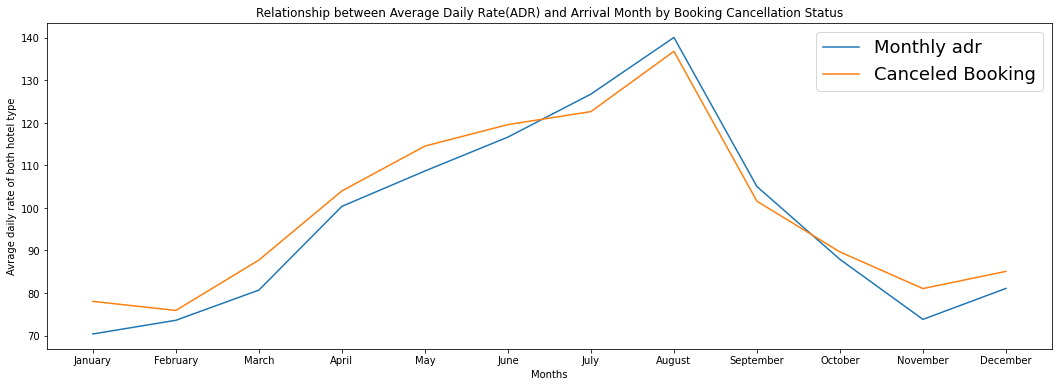

In [48]:
# here we Visualizing the results of canceled booing by monthly adr using line plot
plt.figure(figsize=(18,6))
sns.lineplot(monthly_adr['arrival_date_month'],monthly_adr['adr'])
sns.lineplot(canceled_adr['month'],canceled_adr['adr'])
plt.legend(labels=['Monthly adr','Canceled Booking'], fontsize=18)
plt.xlabel('Months')
plt.ylabel('Avrage daily rate of both hotel type')
plt.title('Relationship between Average Daily Rate(ADR) and Arrival Month by Booking Cancellation Status')
plt.show()

The highest Average Daily Rate (ADR) has occurred in August and due to the highest ADR in August, maybe it could be one of the reasons for more cancelations in August.